In [1]:
import pandas as pd
csv_train = '/home/ubuntu/camera_spoofing/lossless_unified/lossless_train_10012023_10random_crops.csv'
csv_test = '/home/ubuntu/camera_spoofing/lossless_unified/lossless_val_10012023_10random_crops.csv'

In [2]:
def split_df_by_equal(df):
    one_class_quantity = len(df)//250
    delta = len(df) - 250 * one_class_quantity
    new_classes_list = []
    for i in range(250):
        new_classes_list = new_classes_list + [ i for j in range(one_class_quantity)  ]
    new_classes_list = new_classes_list + [249 for i in range(delta)]
    return new_classes_list

def df_sort_new_label(df):
    df = df.sort_values('size')
    new_classes_list = split_df_by_equal(df)
    assert len(df) == len(new_classes_list)
    df['label'] = new_classes_list
    return df

def df_shuffle_relabel(df):
    df0 = df[df['spoof'] == 0]
    df1 = df[df['spoof'] == 1]

    print('df0')
    print(df0)
    df0 = df_sort_new_label(df0)
    print(df0)

    print('df1')
    print(df1)
    df1 = df_sort_new_label(df1)
    df1['label'] = df1['label'] + 250
    print(df1)

    df = pd.concat([df0, df1], ignore_index=True, sort=False)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [3]:
df = pd.read_csv(csv_train, sep=',')
df

,file,spoof
0,/home/ubuntu/camera_spoofing/lossless_unified/...,1
1,/home/ubuntu/camera_spoofing/lossless_unified/...,0
2,/home/ubuntu/camera_spoofing/lossless_unified/...,1
3,/home/ubuntu/camera_spoofing/lossless_unified/...,0
4,/home/ubuntu/camera_spoofing/lossless_unified/...,1
...,...,...
5724835,/home/ubuntu/camera_spoofing/lossless_unified/...,1
5724836,/home/ubuntu/camera_spoofing/lossless_unified/...,1
5724837,/home/ubuntu/camera_spoofing/lossless_unified/...,0
5724838,/home/ubuntu/camera_spoofing/lossless_unified/...,0


<AxesSubplot: >

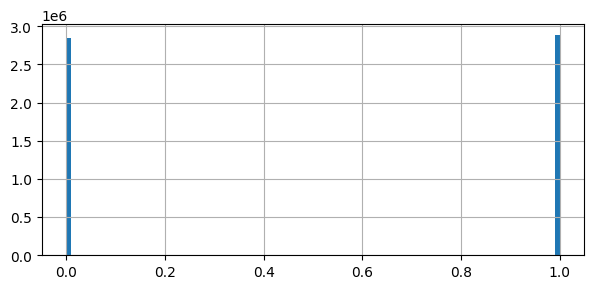

In [6]:
df['spoof'].hist(bins = 100, figsize = (7, 3))

In [7]:
df_test = pd.read_csv(csv_test, sep=',')
df_test

,file,spoof
0,/home/ubuntu/camera_spoofing/lossless_unified/...,0
1,/home/ubuntu/camera_spoofing/lossless_unified/...,1
2,/home/ubuntu/camera_spoofing/lossless_unified/...,1
3,/home/ubuntu/camera_spoofing/lossless_unified/...,1
4,/home/ubuntu/camera_spoofing/lossless_unified/...,1
...,...,...
53535,/home/ubuntu/camera_spoofing/lossless_unified/...,1
53536,/home/ubuntu/camera_spoofing/lossless_unified/...,0
53537,/home/ubuntu/camera_spoofing/lossless_unified/...,0
53538,/home/ubuntu/camera_spoofing/lossless_unified/...,1


<AxesSubplot: >

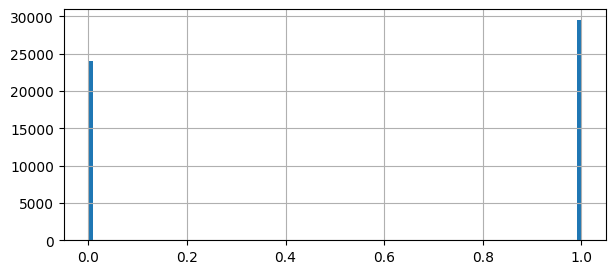

In [8]:
df_test['spoof'].hist(bins = 100, figsize = (7, 3))

In [9]:
df_test['spoof'].value_counts()

1    29470
0    24070
Name: spoof, dtype: int64